## Back propagation com Tensorflow

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
entrada = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])

target_AND = np.array([[0.0],
                       [0.0],
                       [0.0],
                       [1.0]])

target_OR = np.array([[0.0],
                      [1.0],
                      [1.0],
                      [1.0]])

target_XOR = np.array([[0.0],
                       [1.0],
                       [1.0],
                       [0.0]])

In [3]:
def sigmoid(x, derivada=False):
    if not devidada:
        return tf.div(tf.constant(1.0),
                  tf.add(tf.constant(1.0), tf.exp(tf.negative(x))))
    else:
        return tf.multiply(sigmoid(x), tf.subtract(tf.constant(1.0), sigmoid(x)))

In [4]:
# Constante
x = tf.constant(entrada, dtype= tf.float32) # Entrada

In [5]:
# Y também é constante, mas foi colocado em uma função para inicilizar targets diferentes (AND, OR, XOR) de maneira mais fácil.
def inicializarY(target):
    y = tf.constant(target, dtype = tf.float32) # Target
    
    return y

In [6]:
# Camada oculta
w1 = tf.Variable(tf.random_uniform( [2,4] , minval=0.1 , maxval=0.9 , dtype=tf.float32)) 
b1 = tf.Variable(tf.random_uniform( [4] , minval=0.1 , maxval=0.9 , dtype=tf.float32))
h1 = tf.sigmoid(tf.matmul(x, w1) + b1)

In [7]:
# Camada de saída
w2 = tf.Variable(tf.random_uniform( [4,1] , minval=0.1 , maxval=0.9 , dtype=tf.float32)) 
b2 = tf.Variable( tf.random_uniform( [1]   , minval=0.1 , maxval=0.9 , dtype=tf.float32  ))
saida = tf.sigmoid(tf.matmul(h1,w2) + b2)

In [8]:
# Função para cálculo de erro
def erro(target, saida):
    return tf.losses.mean_squared_error(target, saida)

In [9]:
start = tf.global_variables_initializer()

In [10]:
# Sentido backward
def treinamento(target, epocas, learning_rate, verbose = False):
    y = inicializarY(target)
    loss = erro(y, saida)
    train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    custo_val = []
    
    with tf.Session() as sess:
        sess.run(start)
    
        for j in range(epocas):
            [_, custo] = sess.run([train, loss])
            custo_val.append(custo)
            
        resultados = sess.run([saida, loss])
        labels  = "saída,erro (MSE)".split(",")
        
        print("target")
        print(target)
        for label,result in zip(*(labels,resultados)) :
            print ("")
            print (label)
            print (result)
            
    return custo_val

In [11]:
epocas = 10000
lr = 0.3

In [12]:
custo_AND = treinamento(target_AND, epocas, lr)

target
[[0.]
 [0.]
 [0.]
 [1.]]

saída
[[6.7980302e-04]
 [2.0181853e-02]
 [2.0443393e-02]
 [9.7389096e-01]]

erro (MSE)
0.0003768459


In [13]:
custo_OR = treinamento(target_OR, epocas, lr)

target
[[0.]
 [1.]
 [1.]
 [1.]]

saída
[[0.02946308]
 [0.98350394]
 [0.9831934 ]
 [0.99807906]]

erro (MSE)
0.00035658618


In [14]:
custo_XOR = treinamento(target_XOR, epocas, lr)

target
[[0.]
 [1.]
 [1.]
 [0.]]

saída
[[0.03980541]
 [0.96490866]
 [0.96539026]
 [0.03562785]]

erro (MSE)
0.0013207626


### Visualização gráfica da queda da função de custo

Text(0.5, 1.0, 'Descida da função de custo')

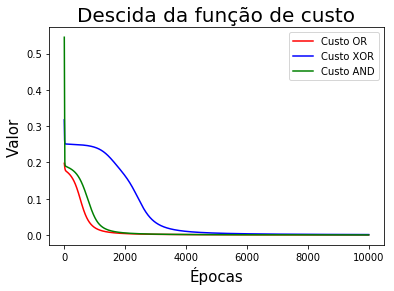

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(custo_OR, label = 'Custo OR', color = 'red')
plt.plot(custo_XOR, label = 'Custo XOR', color = 'blue')
plt.plot(custo_AND, label = 'Custo AND', color = 'green')
plt.legend()
plt.xlabel('Épocas', size = 15)
plt.ylabel('Valor', size = 15)
plt.title('Descida da função de custo', size = 20)